In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

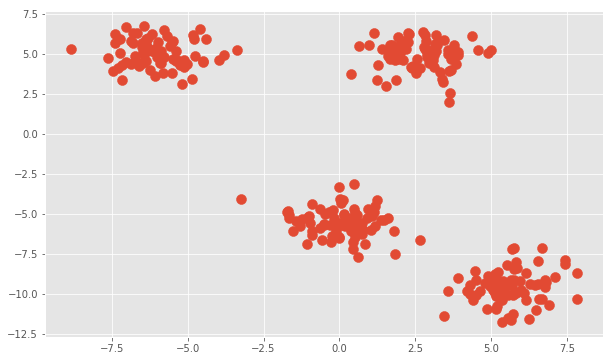

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=1.0, random_state=10)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100);

In [3]:
import cv2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
            10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [4]:
import numpy as np
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 4,
                                          None, criteria, 10, flags)

In [5]:
compactness

527.01581170992

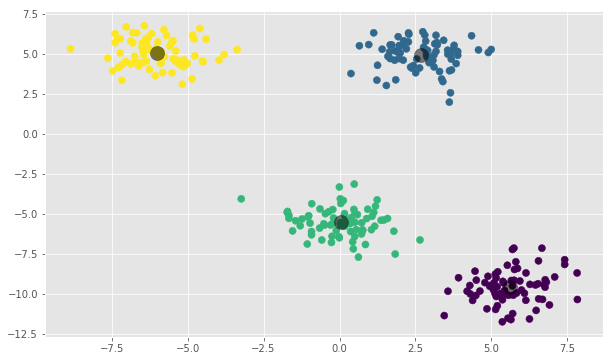

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [7]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=5):
    
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = np.array([X[labels == i].mean(0)
        
        for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

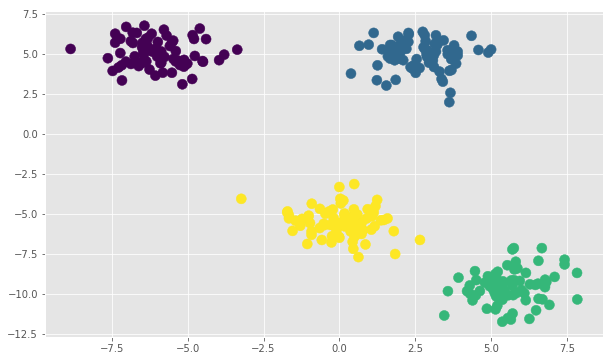

In [8]:
centers, labels = find_clusters(X, 4)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100);

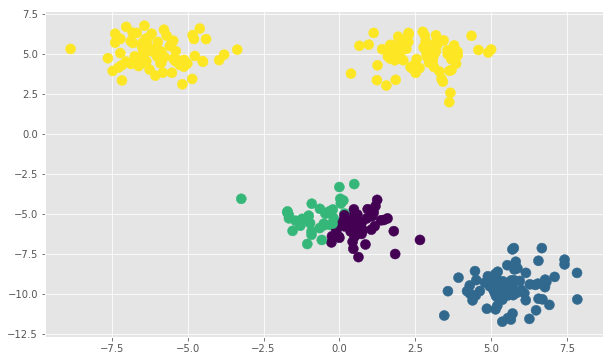

In [9]:
centers, labels = find_clusters(X, 4, rseed=10)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100);

In [10]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 6, None, criteria, 10, flags)

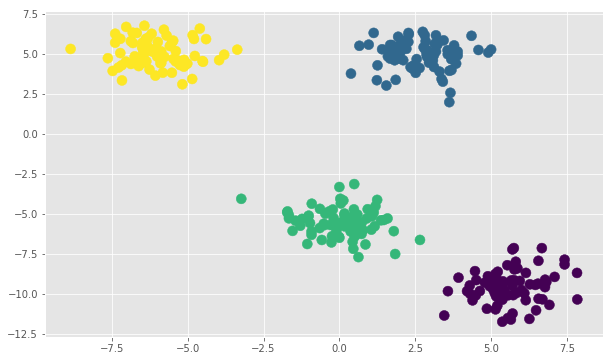

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=100);

In [12]:
kvals = np.arange(2, 10)
compactness = []
for k in kvals:
    c, _, _ = cv2.kmeans(X.astype(np.float32), k, None, criteria, 10, flags)
    compactness.append(c)

Text(0,0.5,'compactness')

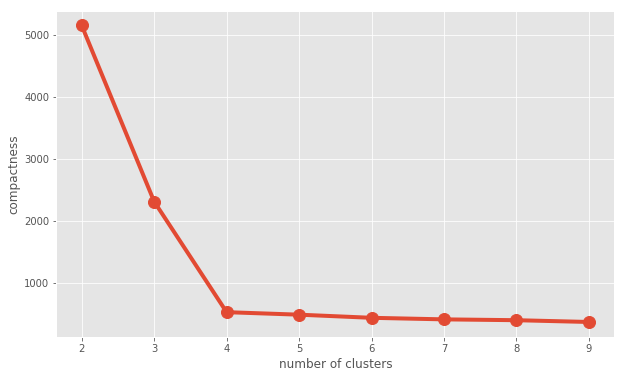

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(kvals, compactness, 'o-', linewidth=4, markersize=12);
plt.xlabel('number of clusters')
plt.ylabel('compactness')

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=12)

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 2, None, criteria, 10, flags)

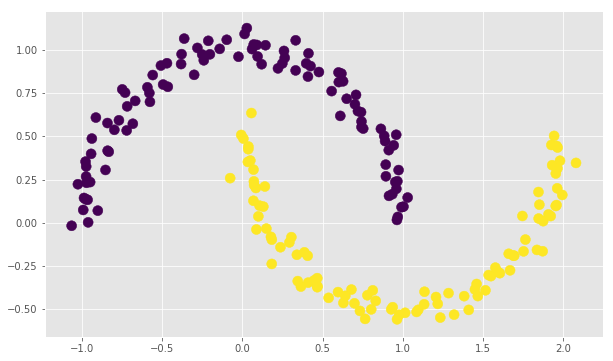

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100);

In [17]:
from sklearn.cluster import SpectralClustering

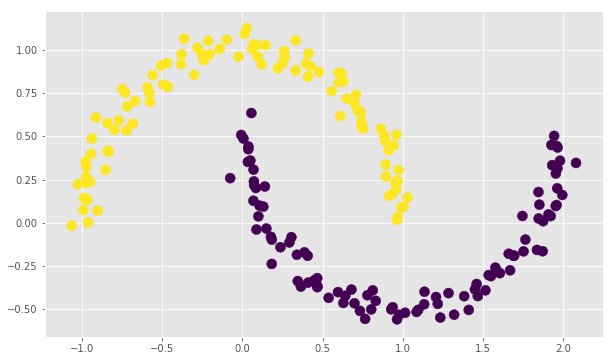

In [18]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100);